In [1]:
pip install mediapipe

  Using cached mediapipe-0.8.8.1-cp38-cp38-win_amd64.whl (49.7 MB)
  Using cached opencv_contrib_python-4.5.4.58-cp38-cp38-win_amd64.whl (42.0 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow==2.4.1

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_auth-2.3.0-py2.py3-none-any.whl (154 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 k

In [4]:
pip install tensorflow-gpu==2.4.1


  Using cached tensorflow_gpu-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)


In [5]:
pip install sklearn


  Using cached sklearn-0.0-py2.py3-none-any.whl


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import os 
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    results=model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results
    

In [4]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2))
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))

In [6]:
mp_drawing.draw_landmarks??

In [7]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
      ret,frame=cap.read()

      image,results=mediapipe_detection(frame,holistic)
      #print(results)
      draw_styled_landmarks(image,results)

      cv2.imshow('Feed',image)
      if cv2.waitKey(10) & 0xFF ==ord('q'):
        break]
    cap.release()
    cv2.destroyAllWindows()

In [8]:
draw_landmarks(frame,results)

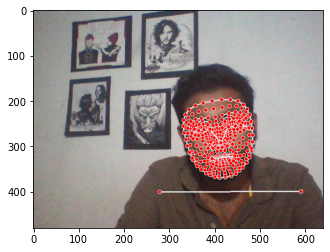

In [9]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [10]:
results.right_hand_landmarks

In [11]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [12]:
test

array([5.52605867e-01, 2.90661979e+00, 3.82920206e-01, 1.52059962e-04])

In [13]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [16]:
extract_keypoints(results).shape

(1662,)

# Folder setup

In [125]:
DATA_PATH=os.path.join('mp_data')

actions=np.array(['down','enter','up','right','left'])
no_sequences=30

sequence_length=30


In [98]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [75]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret,frame=cap.read()
                image,results=mediapipe_detection(frame,holistic)
                #print(results)
                draw_styled_landmarks(image,results)
                if frame_num==0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting Frames for {} Video Number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting Frames for {} video Number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                
                keypoints=extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                cv2.imshow('Feed',image)
                if cv2.waitKey(10) & 0xFF ==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [99]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [126]:
label_map={label:num for num ,label in enumerate(actions)}

In [127]:
label_map

{'down': 0, 'enter': 1, 'up': 2, 'right': 3, 'left': 4}

In [128]:
sequences,labels=[],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [129]:
np.array(sequences).shape

(150, 30, 1662)

In [130]:
np.array(labels).shape

(150,)

In [131]:
x=np.array(sequences)

In [132]:
x.shape

(150, 30, 1662)

In [133]:
y=to_categorical(labels).astype(int)

In [134]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0,

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

In [136]:
y_test.shape

(8, 5)

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [138]:
log_dir=os.path.join('Logs')
tb_Callback=TensorBoard(log_dir=log_dir)

In [139]:
model=Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [140]:
res=[.7,0.2,.1]

In [141]:
actions[np.argmax(res)]

'down'

In [142]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [143]:
model.fit(x_train,y_train,epochs=500,callbacks=[tb_Callback])

Epoch 1/500
5/5 [==============================] - 2s 306ms/step - loss: 23.8050 - categorical_accuracy: 0.2676
Epoch 2/500
5/5 [==============================] - 0s 95ms/step - loss: 39.9329 - categorical_accuracy: 0.1901
Epoch 3/500
5/5 [==============================] - 1s 101ms/step - loss: 22.4024 - categorical_accuracy: 0.1620
Epoch 4/500
5/5 [==============================] - 0s 96ms/step - loss: 45.8874 - categorical_accuracy: 0.2113
Epoch 5/500
5/5 [==============================] - 0s 100ms/step - loss: 49.1240 - categorical_accuracy: 0.2606
Epoch 6/500
5/5 [==============================] - 1s 102ms/step - loss: 37.1521 - categorical_accuracy: 0.1831
Epoch 7/500
5/5 [==============================] - 1s 104ms/step - loss: 30.3648 - categorical_accuracy: 0.1620
Epoch 8/500
5/5 [==============================] - 1s 107ms/step - loss: 25.8165 - categorical_accuracy: 0.1549
Epoch 9/500
5/5 [==============================] - 0s 98ms/step - loss: 17.7228 - categorical_accuracy: 0.

5/5 [==============================] - 0s 98ms/step - loss: 0.9517 - categorical_accuracy: 0.5563
Epoch 73/500
5/5 [==============================] - 1s 102ms/step - loss: 1.0027 - categorical_accuracy: 0.6127
Epoch 74/500
5/5 [==============================] - 0s 98ms/step - loss: 0.7674 - categorical_accuracy: 0.6761
Epoch 75/500
5/5 [==============================] - 0s 95ms/step - loss: 0.5225 - categorical_accuracy: 0.8310
Epoch 76/500
5/5 [==============================] - 0s 96ms/step - loss: 0.4106 - categorical_accuracy: 0.8944
Epoch 77/500
5/5 [==============================] - 1s 104ms/step - loss: 0.4708 - categorical_accuracy: 0.8451
Epoch 78/500
5/5 [==============================] - 1s 103ms/step - loss: 0.4067 - categorical_accuracy: 0.8873
Epoch 79/500
5/5 [==============================] - 1s 105ms/step - loss: 0.4419 - categorical_accuracy: 0.8239
Epoch 80/500
5/5 [==============================] - 0s 97ms/step - loss: 0.3745 - categorical_accuracy: 0.9296
Epoch 81/5

5/5 [==============================] - 0s 96ms/step - loss: 0.0989 - categorical_accuracy: 0.9718
Epoch 219/500
5/5 [==============================] - 0s 95ms/step - loss: 0.0899 - categorical_accuracy: 0.9718
Epoch 220/500
5/5 [==============================] - 1s 100ms/step - loss: 0.0844 - categorical_accuracy: 0.9859
Epoch 221/500
5/5 [==============================] - 0s 93ms/step - loss: 0.0855 - categorical_accuracy: 0.9789
Epoch 222/500
5/5 [==============================] - 1s 101ms/step - loss: 0.0888 - categorical_accuracy: 0.9789
Epoch 223/500
5/5 [==============================] - 0s 92ms/step - loss: 0.0735 - categorical_accuracy: 0.9789
Epoch 224/500
5/5 [==============================] - 0s 95ms/step - loss: 0.0732 - categorical_accuracy: 0.9859
Epoch 225/500
5/5 [==============================] - 0s 94ms/step - loss: 0.0806 - categorical_accuracy: 0.9859
Epoch 226/500
5/5 [==============================] - 0s 96ms/step - loss: 0.0809 - categorical_accuracy: 0.9718
Epoc

5/5 [==============================] - 1s 172ms/step - loss: 0.2605 - categorical_accuracy: 0.9437
Epoch 292/500
5/5 [==============================] - 1s 182ms/step - loss: 0.1658 - categorical_accuracy: 0.9648
Epoch 293/500
5/5 [==============================] - 0s 93ms/step - loss: 0.1628 - categorical_accuracy: 0.9718
Epoch 294/500
5/5 [==============================] - 0s 96ms/step - loss: 0.1396 - categorical_accuracy: 0.9718
Epoch 295/500
5/5 [==============================] - 0s 97ms/step - loss: 0.0970 - categorical_accuracy: 0.9859
Epoch 296/500
5/5 [==============================] - 0s 97ms/step - loss: 0.1012 - categorical_accuracy: 0.9718
Epoch 297/500
5/5 [==============================] - 0s 93ms/step - loss: 0.1026 - categorical_accuracy: 0.9718
Epoch 298/500
5/5 [==============================] - 0s 98ms/step - loss: 0.0864 - categorical_accuracy: 0.9718
Epoch 299/500
5/5 [==============================] - 0s 97ms/step - loss: 0.0984 - categorical_accuracy: 0.9859
Epoc

5/5 [==============================] - 1s 101ms/step - loss: 6.2673e-04 - categorical_accuracy: 1.0000
Epoch 435/500
5/5 [==============================] - 0s 97ms/step - loss: 6.1425e-04 - categorical_accuracy: 1.0000
Epoch 436/500
5/5 [==============================] - 0s 94ms/step - loss: 6.1977e-04 - categorical_accuracy: 1.0000
Epoch 437/500
5/5 [==============================] - 0s 99ms/step - loss: 6.1219e-04 - categorical_accuracy: 1.0000
Epoch 438/500
5/5 [==============================] - 0s 96ms/step - loss: 6.0756e-04 - categorical_accuracy: 1.0000
Epoch 439/500
5/5 [==============================] - 0s 97ms/step - loss: 5.9103e-04 - categorical_accuracy: 1.0000
Epoch 440/500
5/5 [==============================] - 0s 99ms/step - loss: 5.9479e-04 - categorical_accuracy: 1.0000
Epoch 441/500
5/5 [==============================] - 0s 97ms/step - loss: 5.9572e-04 - categorical_accuracy: 1.0000
Epoch 442/500
5/5 [==============================] - 0s 98ms/step - loss: 5.9644e-04 

In [144]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 165       
Total params: 596,741
Trainable params: 596,741
Non-trainable params: 0
________________________________________________

In [145]:
res=model.predict(x_test)
res

array([[8.97572960e-10, 2.89803552e-06, 9.96193290e-01, 3.55054275e-03,
        2.53304723e-04],
       [5.44297869e-23, 9.99998331e-01, 9.01252672e-09, 1.61071148e-06,
        2.86962428e-25],
       [7.85107535e-09, 9.58864354e-19, 1.45483583e-07, 3.77879885e-04,
        9.99621987e-01],
       [1.88031024e-23, 9.99997854e-01, 5.68345504e-09, 2.17810930e-06,
        8.17953171e-26],
       [9.40601641e-09, 4.14962898e-07, 9.99544442e-01, 5.63993344e-05,
        3.98692966e-04],
       [1.11268841e-18, 8.89997464e-05, 9.45283609e-05, 9.99816477e-01,
        6.45670399e-16],
       [2.60425743e-08, 1.27077996e-17, 5.02291016e-07, 7.17319926e-05,
        9.99927759e-01],
       [1.00005588e-18, 1.98240348e-04, 7.62756245e-05, 9.99725521e-01,
        3.09856511e-16]], dtype=float32)

In [158]:
actions[np.argmax(res[0])]

'up'

In [159]:
actions[np.argmax(y_test[0])]

'up'

In [160]:
model.save('action.h5')

In [173]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [174]:
yhat=model.predict(x_test)


In [175]:
ytrue=np.argmax(y_test,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [176]:
ytrue

[2, 1, 4, 1, 2, 3, 4, 3]

In [177]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[6, 0],
        [0, 2]],

       [[6, 0],
        [0, 2]],

       [[6, 0],
        [0, 2]],

       [[6, 0],
        [0, 2]]], dtype=int64)

In [178]:
accuracy_score(ytrue,yhat)

1.0

In [10]:
from scipy import stats

In [16]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [17]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'res' is not defined

<Figure size 1296x1296 with 0 Axes>

In [18]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'model' is not defined